In [1]:
from google.colab import drive
drive.mount('/content/drive/')

%cd /content/drive/MyDrive/news
!ls

Mounted at /content/drive/
/content/drive/MyDrive/news
 ColabModels		      news_embeddings.ipynb	       results
 data			      news_preprocess.ipynb
'LLM_News_v1 (1) (1).ipynb'   predict_range_using_news.ipynb


In [2]:
%cd data
!ls

/content/drive/MyDrive/news/data
btc_1min.pickle  logs			      results
finbert_crypto	 news_20250225to20250510.csv  summ_news.csv


In [3]:
import pandas as pd
import numpy as np

In [4]:
df = pd.read_csv('summ_news.csv')
df.head()

,ID,releasedAt,title,subtitle,sourceName,sourceUrl,source,slug,asset_names,asset_slugs,asset_symbols,content,pegasus_summ
0,67bf0e677abefca47e66327d,2025-02-25 00:00:00,Traders are Elevating Their Portfolio with LIS...,"The digital asset space sees constant shifts, ...",CryptoNewsLand,https://cryptonewsland.com/listing1000-350-bda...,coinmarketcap,listing1000-350-bdag-bonus-elevate-your-crypto...,"Orbit, Monero, BlockDAG, would, Celestia","orbit, monero, blockdag, wouldmeme, celestia","ORBIT, XMR, BDAG, WOULD, TIA","The digital asset space sees constant shifts, ...",BlockDAG's presale has reached over $197.5 mil...
1,67bf0e677abefca47e66327e,2025-02-25 00:00:00,2025’s Crypto Battle: Altcoin vs. XRP and Bitc...,Digital currencies now play a key role in glob...,Crypto Front News,https://coinmarketcap.com/community/en/article...,coinmarketcap,blockdag-vs-bitcoin-xrp-which-crypto-holds-lon...,"Ethereum, Bitcoin, BlockDAG, XRP, One","ethereum, bitcoin, blockdag, xrp, gmix","ETH, BTC, BDAG, XRP, GMIX",Digital currencies now play a key role in glob...,BlockDAG (BDAG) is a cryptocurrency that uses ...
2,67bf0e677abefca47e66327f,2025-02-25 00:00:00,Top Cryptos to Buy Now: The Best Choices for 2025,The cryptocurrency market in 2025 offers excit...,TheNewsCrypto,https://coinmarketcap.com/community/en/article...,coinmarketcap,top-cryptos-to-buy-now-the-best-choices-for-2025,"Litecoin, Top, BlockDAG, Chainlink, Stellar","litecoin, top-protocol, blockdag, chainlink, s...","LTC, TOP, BDAG, LINK, XLM",The cryptocurrency market in 2025 offers excit...,"BlockDAG, Chainlink, Litecoin, XRP, and Stella..."
3,67bf0e677abefca47e663280,2025-02-25 00:00:00,Explore The Best Crypto Presale to Buy Now wit...,Pepeto Presale: The Next Meme Coin with x1000 ...,WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,explore-the-best-crypto-presale-to-buy-now-wit...,"Pepe, Pepe, Pepe, Pepe, Shiba Inu","pepe, pepe-on-base, pepesol-cto, pepe-solana, ...","PEPE, PEPE, $PEPE, PEPE, SHIB",Pepeto Presale: The Next Meme Coin with x1000 ...,"Pepeto, a meme-inspired cryptocurrency, is set..."
4,67bf0e677abefca47e663281,2025-02-25 00:00:00,ITI Launches Master’s in Trading Program for A...,"Barcelona, Spain, 25th February 2025, FinanceWire",WalletInvestor,https://coinmarketcap.com/community/en/article...,coinmarketcap,iti-launches-masters-in-trading-program-for-am...,"STA, Steve, Steve, Steve","sta-token, steve, steve-token, steve-bsc","STA, STEVE, STEVE, STEVE","Barcelona, Spain, February 25th, 2025, Finance...",The International Trading Institute (ITI) has ...


In [5]:
con_df = df[['releasedAt', 'content']]
summ_df = df[['releasedAt', 'pegasus_summ']]

summ_df.head()

,releasedAt,pegasus_summ
0,2025-02-25 00:00:00,BlockDAG's presale has reached over $197.5 mil...
1,2025-02-25 00:00:00,BlockDAG (BDAG) is a cryptocurrency that uses ...
2,2025-02-25 00:00:00,"BlockDAG, Chainlink, Litecoin, XRP, and Stella..."
3,2025-02-25 00:00:00,"Pepeto, a meme-inspired cryptocurrency, is set..."
4,2025-02-25 00:00:00,The International Trading Institute (ITI) has ...


In [6]:
con_df.head()

,releasedAt,content
0,2025-02-25 00:00:00,"The digital asset space sees constant shifts, ..."
1,2025-02-25 00:00:00,Digital currencies now play a key role in glob...
2,2025-02-25 00:00:00,The cryptocurrency market in 2025 offers excit...
3,2025-02-25 00:00:00,Pepeto Presale: The Next Meme Coin with x1000 ...
4,2025-02-25 00:00:00,"Barcelona, Spain, February 25th, 2025, Finance..."


In [7]:
summ_df['pegasus_summ'][213123]

'In an interview with Oprah Winfrey, former New York City Mayor Rudy Giuliani said, "I don\'t think there\'s anybody in New York City who doesn\'t think that there\'s something wrong with the city of New York." He added, "I don\'t think there'

In [8]:
# Replace for specific rows with fallback logic
specific_rows = [323,
6699,
8038,
9731,
11236,
11240,
14851,
14852,
15853,
15959,
15960,
15967,
15968,
15987,
15991,
15993,
16054,
16061,
16069,
16073,
16953,
20167,
20230,
25786,
27783,
29737,
29932,
30155,
34158,
34159,
34160,
34208,
34214,
34226,
34236,
34269,
34288,
34296,
34315,
34321,
34339,
34419,
34420,
34421,
34435,
34502,
34504,
34554,
34584,
34645,
34646,
34651,
34678,
34679,
34683,
34691,
36043,
38649,
38650,
38663,
38710,
38713,
38715,
38727,
38728,
38734,
38753,
38758,
38814,
39134,
39147,
40481,
40610,
40616,
40735,
41248,
41257,
41260,
41261,
41262,
41264,
41266,
41279,
41280,
41290,
43094,
43095,
43096,
43751,
43788,
44081,
50614,
52292,
52307,
52316,
52320,
52321,
52368,
52370,
52379,
52383,
52402,
52403,
52428,
52429,
52443,
52445,
52486,
52490,
52492,
54455,
55232,
55237,
55252,
55276,
55609,
57487,
57491,
57492,
57498,
57502,
59986,
59992,
60532,
64405,
64406,
64416,
64418,
64897,
65490,
65629,
66366,
66391,
66768,
66776,
66788,
66796,
66797,
66824,
66839,
66849,
66850,
66853,
66868,
66873,
66878,
66891,
68173,
68789,
70292,
74988,
76714,
76921,
76994,
81597,
86544,
90483,
90484,
91559,
91566,
91874,
91877,
92924,
92927,
92929,
92934,
92935,
92937,
92940,
92946,
92950,
92961,
92967,
92970,
92972,
92981,
92987,
92988,
92998,
93075,
93082,
93085,
93093,
93094,
93097,
93100,
93112,
93113,
93119,
93130,
93131,
93132,
93152,
93154,
93158,
93219,
93242,
93247,
93250,
96532,
96559,
97086,
98113,
98117,
98120,
103472,
103473,
106517,
108659,
111487,
113460,
113486,
113873,
115088,
115256,
115363,
116876,
118733,
118737,
118991,
118994,
121633,
123833,
123879,
135926,
135928,
141073,
141136,
141159,
142434,
146341,
150197,
151309,
151340,
160777,
178409,
209010,
209208,
213123]  # adjust as needed
con_df.loc[specific_rows, 'content'] = df.loc[specific_rows, 'subtitle'].fillna(df.loc[specific_rows, 'title'])

<ipython-input-8-ddb0bb2af808>:241: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  con_df.loc[specific_rows, 'content'] = df.loc[specific_rows, 'subtitle'].fillna(df.loc[specific_rows, 'title'])


In [9]:
summ_df.loc[specific_rows, 'pegasus_summ'] = df.loc[specific_rows, 'subtitle'].fillna(df.loc[specific_rows, 'title'])

<ipython-input-9-372bc686e0a2>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  summ_df.loc[specific_rows, 'pegasus_summ'] = df.loc[specific_rows, 'subtitle'].fillna(df.loc[specific_rows, 'title'])


In [10]:
oh_df = pd.read_pickle('btc_1min.pickle')
oh_df.head()

,dateTime,open,high,low,close,volume,closeTime,quoteAssetVolume,numberOfTrades,takerBuyBaseVol,takerBuyQuoteVol,ignore
0,2025-02-01 00:00:00,102429.56,102431.38,102333.00,102333.01,13.95242000,2025-02-01 00:00:59.999,1428274.95948110,3208,2.41966000,247693.80458960,0
1,2025-02-01 00:01:00,102333.01,102360.02,102328.29,102340.67,6.13914000,2025-02-01 00:01:59.999,628315.57433470,1939,3.99198000,408551.32104090,0
2,2025-02-01 00:02:00,102340.67,102363.51,102319.00,102319.01,3.69962000,2025-02-01 00:02:59.999,378614.96583750,1778,1.53574000,157173.86438010,0
3,2025-02-01 00:03:00,102319.01,102330.00,102300.00,102300.01,4.94628000,2025-02-01 00:03:59.999,506099.53088330,1411,1.89116000,193501.33556970,0
4,2025-02-01 00:04:00,102300.00,102319.23,102274.50,102318.00,5.83550000,2025-02-01 00:04:59.999,596938.78673800,3296,4.09921000,419328.96693330,0


In [11]:
oh_df = oh_df[['dateTime',	'open',	'high',	'low',	'close',	'volume']]

In [12]:
oh_df.head()

,dateTime,open,high,low,close,volume
0,2025-02-01 00:00:00,102429.56,102431.38,102333.00,102333.01,13.95242000
1,2025-02-01 00:01:00,102333.01,102360.02,102328.29,102340.67,6.13914000
2,2025-02-01 00:02:00,102340.67,102363.51,102319.00,102319.01,3.69962000
3,2025-02-01 00:03:00,102319.01,102330.00,102300.00,102300.01,4.94628000
4,2025-02-01 00:04:00,102300.00,102319.23,102274.50,102318.00,5.83550000


In [13]:
summ_df = summ_df[['releasedAt', 'pegasus_summ']]

In [14]:
summ_df.head()

,releasedAt,pegasus_summ
0,2025-02-25 00:00:00,BlockDAG's presale has reached over $197.5 mil...
1,2025-02-25 00:00:00,BlockDAG (BDAG) is a cryptocurrency that uses ...
2,2025-02-25 00:00:00,"BlockDAG, Chainlink, Litecoin, XRP, and Stella..."
3,2025-02-25 00:00:00,"Pepeto, a meme-inspired cryptocurrency, is set..."
4,2025-02-25 00:00:00,The International Trading Institute (ITI) has ...


In [15]:
con_df = con_df[['releasedAt', 'content']]

In [16]:
con_df.head()

,releasedAt,content
0,2025-02-25 00:00:00,"The digital asset space sees constant shifts, ..."
1,2025-02-25 00:00:00,Digital currencies now play a key role in glob...
2,2025-02-25 00:00:00,The cryptocurrency market in 2025 offers excit...
3,2025-02-25 00:00:00,Pepeto Presale: The Next Meme Coin with x1000 ...
4,2025-02-25 00:00:00,"Barcelona, Spain, February 25th, 2025, Finance..."


In [17]:
import torch
import torch.nn.functional as F
from transformers import Trainer, TrainingArguments, AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import Dataset
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
from collections import Counter
import pandas as pd
import numpy as np
import os

Training for 15-step horizon...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([4, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([4]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,1.258000
1000,1.246300
1500,1.230100
2000,1.230600
2500,1.225600
3000,1.219500
3500,1.221300


                   precision    recall  f1-score   support

  high_volatility       0.00      0.00      0.00       467
   low_volatility       0.27      0.22      0.25      6505
medium_volatility       0.20      0.15      0.17      3338
           stable       0.68      0.77      0.72     18200

         accuracy                           0.56     28510
        macro avg       0.29      0.29      0.29     28510
     weighted avg       0.52      0.56      0.54     28510

Accuracy: 0.563
Precision: 0.5206
Recall: 0.5625
F1-score: 0.5387


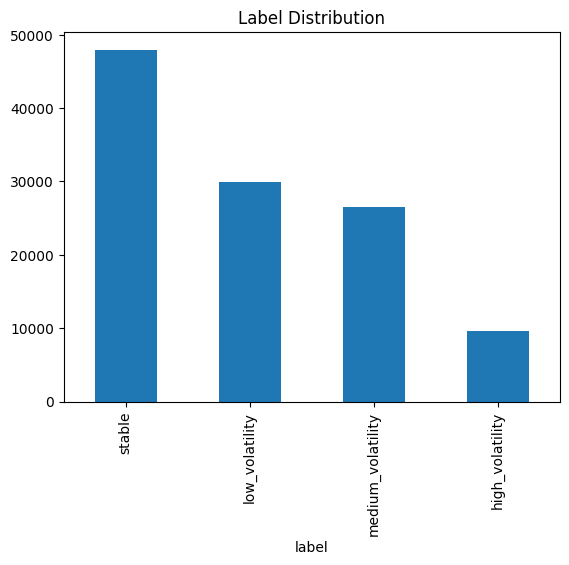

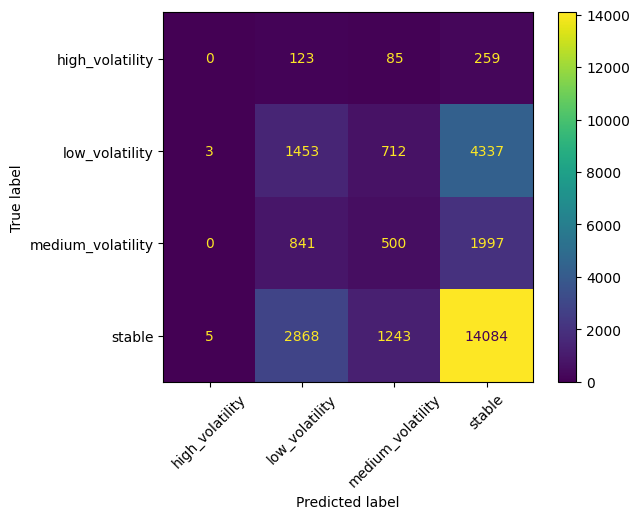

In [ ]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            str(self.texts[idx]),
            truncation=True,
            padding='max_length',
            max_length=512,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long)
        }

def merge_ohlcv_with_exact_news(ohlcv_df, news_df):
    ohlcv_df['dateTime'] = pd.to_datetime(ohlcv_df['dateTime'])
    news_df['releasedAt'] = pd.to_datetime(news_df['releasedAt'])

    ohlcv_df['minute'] = ohlcv_df['dateTime'].dt.floor('min')
    news_df['minute'] = news_df['releasedAt'].dt.floor('min')

    # Aggregate news per minute by concatenating
    news_per_minute = news_df.groupby('minute')['pegasus_summ']\
        .apply(lambda x: ' | '.join(x)).reset_index()

    merged = ohlcv_df.merge(news_per_minute, on='minute', how='left')

    merged['pegasus_summ'] = merged['pegasus_summ'].fillna('no news')

    return merged.drop(columns=['minute'])


def prepare_data(news_df, ohlcv_df, steps=15):
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)

    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    def categorize_volatility(x):
        if pd.isna(x):
            return np.nan
        if x >= 0.8:
            return 'high_volatility'
        elif x >= 0.4:
            return 'medium_volatility'
        elif x >= 0.25:
            return 'low_volatility'
        else:
            return 'stable'

    ohlcv_df['label'] = ohlcv_df['range'].apply(categorize_volatility)

    merged = merge_ohlcv_with_exact_news(ohlcv_df, news_df)

    # Drop rows without valid labels
    merged = merged.dropna(subset=['label'])

    return merged[['dateTime', 'pegasus_summ', 'label']]


def train_and_predict(news_df, ohlcv_df, steps=15):
    data = prepare_data(news_df, ohlcv_df, steps)

    split = int(len(data) * 0.8)
    train_data = data.iloc[:split]
    test_data = data.iloc[split:]

    train_data['label'].value_counts().plot(kind='bar', title='Label Distribution')

    train_labels_set = set(train_data['label'])
    test_data = test_data[test_data['label'].isin(train_labels_set)]

    le = LabelEncoder()
    train_labels = le.fit_transform(train_data['label'])
    test_labels = le.transform(test_data['label'])

    device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
    model = AutoModelForSequenceClassification.from_pretrained(
        'ProsusAI/finbert',
        num_labels=len(le.classes_),
        ignore_mismatched_sizes=True
    ).to(device)

    train_dataset = NewsDataset(train_data['pegasus_summ'].tolist(), train_labels, tokenizer)

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=1,
        per_device_train_batch_size=32,
        gradient_accumulation_steps=1,
        save_strategy='no',
        logging_steps=500,
        dataloader_num_workers=4,
        fp16=True,
        dataloader_pin_memory=True,
    )

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
    )

    trainer.train()

    model.eval()
    predictions = []
    batch_size = 64

    test_texts = test_data['pegasus_summ'].tolist()
    for i in range(0, len(test_texts), batch_size):
        batch = test_texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True,
                          max_length=512, padding=True).to(device)

        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
            batch_preds = le.inverse_transform(preds)
            predictions.extend(batch_preds)

    accuracy = accuracy_score(test_data['label'], predictions)
    precision = precision_score(test_data['label'], predictions, average='weighted')
    recall = recall_score(test_data['label'], predictions, average='weighted')
    f1 = f1_score(test_data['label'], predictions, average='weighted')
    cm = confusion_matrix(test_data['label'], predictions, labels=le.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(xticks_rotation=45)
    print(classification_report(test_data['label'], predictions, target_names=le.classes_))

    return accuracy, precision, recall, f1, predictions, test_data

def run_prediction(news_df, ohlcv_df, steps=15):
    print(f"Training for {steps}-step horizon...")
    accuracy, precision, recall, f1, preds, test = train_and_predict(news_df, ohlcv_df, steps)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return accuracy, preds, test


accuracy, predictions, test_data = run_prediction(summ_df, oh_df, steps=15)

Training for 15-step horizon...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at ProsusAI/finbert and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).


Step,Training Loss
500,0.688400
1000,0.680800
1500,0.680000
2000,0.673600
2500,0.671600
3000,0.672500
3500,0.672700
4000,0.668600
4500,0.670200
5000,0.668000


                   precision    recall  f1-score   support

  high_volatility       0.32      0.52      0.40      7220
normal_volatility       0.79      0.62      0.69     21290

         accuracy                           0.59     28510
        macro avg       0.56      0.57      0.54     28510
     weighted avg       0.67      0.59      0.62     28510

Accuracy: 0.594
Precision: 0.6725
Recall: 0.5939
F1-score: 0.6186


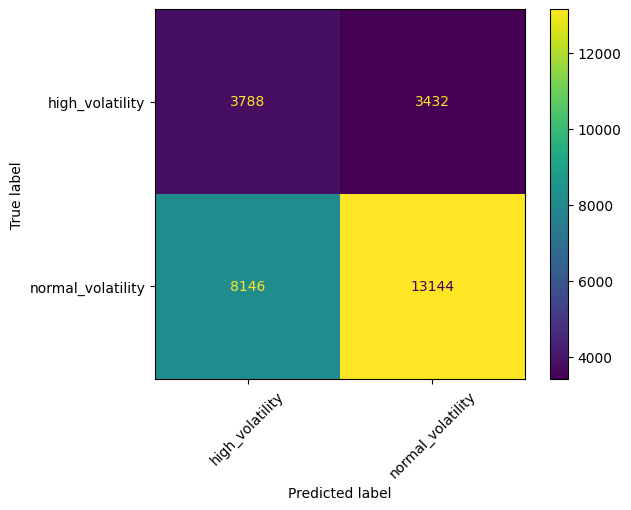

In [29]:
class NewsDataset(Dataset):
    def __init__(self, texts, labels, sample_weights, tokenizer):
        self.texts = texts
        self.labels = labels
        self.sample_weights = sample_weights
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            str(self.texts[idx]),
            truncation=True,
            padding='max_length',
            max_length=512,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long),
            'sample_weights': torch.tensor(self.sample_weights[idx], dtype=torch.float)
        }


def merge_ohlcv_with_exact_news(ohlcv_df, news_df):
    ohlcv_df['dateTime'] = pd.to_datetime(ohlcv_df['dateTime'])
    news_df['releasedAt'] = pd.to_datetime(news_df['releasedAt'])

    ohlcv_df['minute'] = ohlcv_df['dateTime'].dt.floor('min')
    news_df['minute'] = news_df['releasedAt'].dt.floor('min')

    # Aggregate news per minute by concatenating
    news_per_minute = news_df.groupby('minute')['pegasus_summ']\
        .apply(lambda x: ' | '.join(x)).reset_index()

    merged = ohlcv_df.merge(news_per_minute, on='minute', how='left')

    merged['pegasus_summ'] = merged['pegasus_summ'].fillna('no news')

    return merged.drop(columns=['minute'])


def categorize_volatility(range_pct):
    if pd.isna(range_pct):
        return np.nan

    if range_pct >= 0.3:
        return 'high_volatility'
    else:
        return 'normal_volatility'


def prepare_data(news_df, ohlcv_df, steps=15):
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)

    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    ohlcv_df['label'] = ohlcv_df['range'].apply(lambda x: categorize_volatility(x))

    merged = merge_ohlcv_with_exact_news(ohlcv_df, news_df)

    # Drop rows without valid labels
    merged = merged.dropna(subset=['label'])

    return merged[['dateTime', 'pegasus_summ', 'label']]


class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        sample_weights = inputs.get("sample_weights")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        loss = F.cross_entropy(logits, labels, reduction='none')
        if sample_weights is not None:
            loss = loss * sample_weights
        loss = loss.mean()

        return (loss, outputs) if return_outputs else loss

def train_and_predict(news_df, ohlcv_df, steps=15):
    data = prepare_data(news_df, ohlcv_df, steps)
    split = int(len(data) * 0.8)
    train_data = data.iloc[:split]
    test_data = data.iloc[split:]

    train_labels_raw = train_data['label'].tolist()
    test_data = test_data[test_data['label'].isin(train_labels_raw)]

    le = LabelEncoder()
    train_labels = le.fit_transform(train_data['label'])
    test_labels = le.transform(test_data['label'])
    num_classes = len(le.classes_)

    # Compute sample weights for each training example
    label_counts = Counter(train_data['label'])
    total = len(train_data)
    sample_weights = []
    for label in train_data['label']:
        weight = total / (len(label_counts) * label_counts[label])
        sample_weights.append(min(weight, 10.0))  # Cap at 10x


    tokenizer = AutoTokenizer.from_pretrained('ProsusAI/finbert')
    model = AutoModelForSequenceClassification.from_pretrained(
        'ProsusAI/finbert',
        num_labels=num_classes,
        ignore_mismatched_sizes=True
    ).to('cuda' if torch.cuda.is_available() else 'cpu')

    # Dataset with sample weights
    train_dataset = NewsDataset(
        texts=train_data['pegasus_summ'].tolist(),
        labels=train_labels,
        sample_weights=sample_weights,
        tokenizer=tokenizer
    )

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=1,
        per_device_train_batch_size=16,
        learning_rate=2e-5,
        save_strategy='no',
        logging_steps=500,
        dataloader_num_workers=4,
        fp16=True,
        dataloader_pin_memory=True,
        warmup_steps=200,
        weight_decay=0.01,
    )

    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
    )

    trainer.train()

    model.eval()
    device = next(model.parameters()).device
    predictions = []
    test_texts = test_data['pegasus_summ'].tolist()
    batch_size = 64

    for i in range(0, len(test_texts), batch_size):
        batch = test_texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
            predictions.extend(le.inverse_transform(preds))

    true_labels = test_data['label'].tolist()
    acc = accuracy_score(true_labels, predictions)
    prec = precision_score(true_labels, predictions, average='weighted')
    rec = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    cm = confusion_matrix(true_labels, predictions, labels=le.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(xticks_rotation=45)

    print(classification_report(true_labels, predictions, target_names=le.classes_))
    return acc, prec, rec, f1, predictions, test_data


def run_prediction(news_df, ohlcv_df, steps=15):
    print(f"Training for {steps}-step horizon...")
    accuracy, precision, recall, f1, preds, test = train_and_predict(news_df, ohlcv_df, steps)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return accuracy, preds, test


accuracy, predictions, test_data = run_prediction(summ_df, oh_df, steps=15)

In [18]:
%cd /content/drive/MyDrive/news/ColabModels
!ls

/content/drive/.shortcut-targets-by-id/1htASoZVoRYkjzl8Svsi8fxc-x7eUEtCO/ColabModels
bigbird-2048-final  longformer-2048-final  results
bigbird-4096-final  longformer-4096-final


In [19]:
def merge_ohlcv_with_news(ohlcv_df, news_df):
    ohlcv_df['dateTime'] = pd.to_datetime(ohlcv_df['dateTime'])
    news_df['releasedAt'] = pd.to_datetime(news_df['releasedAt'])

    merged_data = []

    for idx, row in ohlcv_df.iterrows():
        current_time = row['dateTime']

        time_window_start = current_time - pd.Timedelta(minutes=30)
        relevant_news = news_df[
            (news_df['releasedAt'] >= time_window_start) &
            (news_df['releasedAt'] < current_time)
        ]

        if len(relevant_news) == 0:
            content = "No news."    #which we have sutitle and title for nan values
        elif len(relevant_news) == 1:
            content = relevant_news.iloc[0]['content']
        else:
            most_recent_news = relevant_news.loc[relevant_news['releasedAt'].idxmax()]
            content = most_recent_news['content']

        merged_data.append({
            'dateTime': current_time,
            'content': content,
            'high': row['high'],
            'low': row['low'],
            'close': row['close'],
            'label': row.get('label', None)
        })

    return pd.DataFrame(merged_data)


def categorize_volatility(range_pct):
    if pd.isna(range_pct):
        return np.nan

    if range_pct >= 0.3:
        return 'high_volatility'
    else:
        return 'normal_volatility'


def prepare_data(news_df, ohlcv_df, steps=15):
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)

    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    ohlcv_df['label'] = ohlcv_df['range'].apply(lambda x: categorize_volatility(x))

    merged = merge_ohlcv_with_news(ohlcv_df, news_df)

    merged = merged.dropna(subset=['label'])

    return merged[['dateTime', 'content', 'label']]


data = prepare_data(con_df, oh_df)


Training for 15-step horizon...


Some weights of BigBirdForSequenceClassification were not initialized from the model checkpoint at bigbird-4096-final and are newly initialized because the shapes did not match:
- classifier.out_proj.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([2]) in the model instantiated
- classifier.out_proj.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([2, 768]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Using the `WANDB_DISABLED` environment variable is deprecated and will be removed in v5. Use the --report_to flag to control the integrations used for logging result (for instance --report_to none).
Attention type 'block_sparse' is not possible if sequence_length: 459 <= num global tokens: 2 * config.block_size + min. num sliding tokens: 3 * config.block_size + config.num_random_blocks * config.block_size + additional buffer: config.num_random_blocks * co

Step,Training Loss
500,0.687000
1000,0.683100
1500,0.680600
2000,0.679600
2500,0.677700


Step,Training Loss
500,0.687000
1000,0.683100
1500,0.680600
2000,0.679600
2500,0.677700
3000,0.673800
3500,0.672300


                   precision    recall  f1-score   support

  high_volatility       0.28      0.63      0.39      7220
normal_volatility       0.79      0.46      0.58     21290

         accuracy                           0.50     28510
        macro avg       0.53      0.54      0.49     28510
     weighted avg       0.66      0.50      0.53     28510

Accuracy: 0.505
Precision: 0.6583
Recall: 0.5046
F1-score: 0.5341


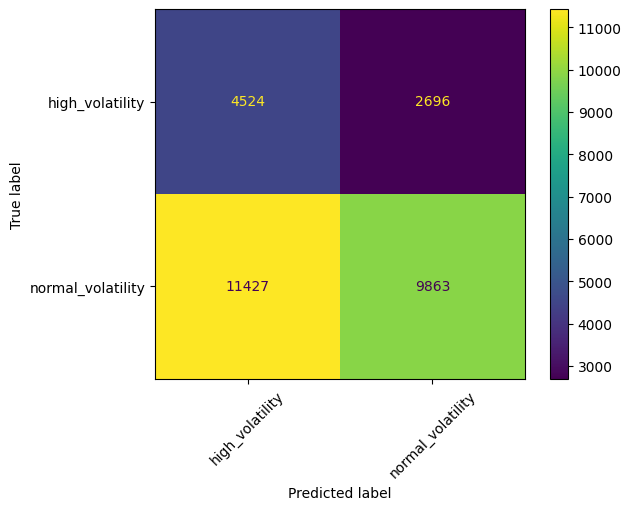

In [21]:
from transformers import DataCollatorWithPadding


os.environ["WANDB_DISABLED"] = "true"
os.environ["PYTORCH_CUDA_ALLOC_CONF"] = "expandable_segments:True"
torch.cuda.empty_cache()


class NewsDataset(Dataset):
    def __init__(self, texts, labels, sample_weights, tokenizer):
        self.texts = texts
        self.labels = labels
        self.sample_weights = sample_weights
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(
            str(self.texts[idx]),
            truncation=True,
            padding=True,  # dynamic padding
            max_length=4096,
            return_tensors='pt'
        )
        return {
            'input_ids': encoding['input_ids'].flatten(),
            'attention_mask': encoding['attention_mask'].flatten(),
            'labels': torch.tensor(self.labels[idx], dtype=torch.long),
            'sample_weights': torch.tensor(self.sample_weights[idx], dtype=torch.float)
        }


class WeightedTrainer(Trainer):
    def compute_loss(self, model, inputs, return_outputs=False, **kwargs):
        labels = inputs.get("labels")
        sample_weights = inputs.get("sample_weights")
        outputs = model(**inputs)
        logits = outputs.get("logits")

        loss = F.cross_entropy(logits, labels, reduction='none')
        if sample_weights is not None:
            loss = loss * sample_weights
        loss = loss.mean()

        return (loss, outputs) if return_outputs else loss


def train_and_predict(news_df, ohlcv_df, steps=15):
    split = int(len(data) * 0.8)
    train_data = data.iloc[:split]
    test_data = data.iloc[split:]

    train_labels_raw = train_data['label'].tolist()
    test_data = test_data[test_data['label'].isin(train_labels_raw)]

    le = LabelEncoder()
    train_labels = le.fit_transform(train_data['label'])
    test_labels = le.transform(test_data['label'])
    num_classes = len(le.classes_)

    # Compute sample weights for each training example
    label_counts = Counter(train_data['label'])
    total = len(train_data)
    sample_weights = []
    for label in train_data['label']:
        weight = total / (len(label_counts) * label_counts[label])
        sample_weights.append(min(weight, 10.0))  # Cap at 10x

    class_weights = None

    model_path = 'bigbird-4096-final'
    tokenizer = AutoTokenizer.from_pretrained(model_path)
    model = AutoModelForSequenceClassification.from_pretrained(
        model_path,
        num_labels=num_classes,
        ignore_mismatched_sizes=True
    ).to('cuda' if torch.cuda.is_available() else 'cpu')

    train_dataset = NewsDataset(
        texts=train_data['content'].tolist(),
        labels=train_labels,
        sample_weights=sample_weights,
        tokenizer=tokenizer
    )

    training_args = TrainingArguments(
        output_dir='./results',
        num_train_epochs=1,
        per_device_train_batch_size=2,
        gradient_accumulation_steps=16,
        learning_rate=2e-5,
        save_strategy='no',
        logging_steps=500,
        dataloader_num_workers=3,
        fp16=True,
        dataloader_pin_memory=False,
        warmup_steps=200,
        weight_decay=0.01,
        gradient_checkpointing=True,  # Trade compute for memory
        dataloader_drop_last=True,    # Avoid partial batches
    )


    data_collator = DataCollatorWithPadding(tokenizer=tokenizer, padding=True)

    trainer = WeightedTrainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        data_collator=data_collator,
    )

    trainer.train()

    model.eval()
    device = next(model.parameters()).device
    predictions = []
    test_texts = test_data['content'].tolist()
    batch_size = 64

    for i in range(0, len(test_texts), batch_size):
        batch = test_texts[i:i+batch_size]
        inputs = tokenizer(batch, return_tensors='pt', truncation=True, padding=True, max_length=512).to(device)
        with torch.no_grad():
            outputs = model(**inputs)
            preds = torch.argmax(outputs.logits, dim=-1).cpu().numpy()
            predictions.extend(le.inverse_transform(preds))

    true_labels = test_data['label'].tolist()
    acc = accuracy_score(true_labels, predictions)
    prec = precision_score(true_labels, predictions, average='weighted')
    rec = recall_score(true_labels, predictions, average='weighted')
    f1 = f1_score(true_labels, predictions, average='weighted')

    cm = confusion_matrix(true_labels, predictions, labels=le.classes_)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=le.classes_)
    disp.plot(xticks_rotation=45)

    print(classification_report(true_labels, predictions, target_names=le.classes_))
    return acc, prec, rec, f1, predictions, test_data


def run_prediction(news_df, ohlcv_df, steps=15):
    print(f"Training for {steps}-step horizon...")
    accuracy, precision, recall, f1, preds, test = train_and_predict(news_df, ohlcv_df, steps)
    print(f"Accuracy: {accuracy:.3f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    return accuracy, preds, test


accuracy, predictions, test_data = run_prediction(con_df, oh_df, steps=15)

RANGE DISTRIBUTION ANALYSIS
Total samples: 142,546
Mean range: 0.3534%
Median range: 0.2656%
Std deviation: 0.3060%
Min range: 0.0024%
Max range: 5.2705%

PERCENTILES:
10th percentile: 0.1146%
20th percentile: 0.1507%
25th percentile: 0.1686%
30th percentile: 0.1869%
40th percentile: 0.2239%
50th percentile: 0.2656%
60th percentile: 0.3154%
70th percentile: 0.3833%
75th percentile: 0.4294%
80th percentile: 0.4893%
90th percentile: 0.6893%
95th percentile: 0.9136%
99th percentile: 1.5243%

Skewness: 3.4826 (right-skewed)
Kurtosis: 23.3788 (heavy-tailed)

THRESHOLD ANALYSIS:
Threshold  | High Vol % | High Vol Count | Normal Vol Count
------------------------------------------------------------
     0.1%  |     93.3% |      132,934 |          9,612
     0.2%  |     66.5% |       94,794 |         47,752
     0.3%  |     42.9% |       61,091 |         81,455
     0.4%  |     28.0% |       39,913 |        102,633
     0.5%  |     19.2% |       27,399 |        115,147
     0.6%  |     13.5% |

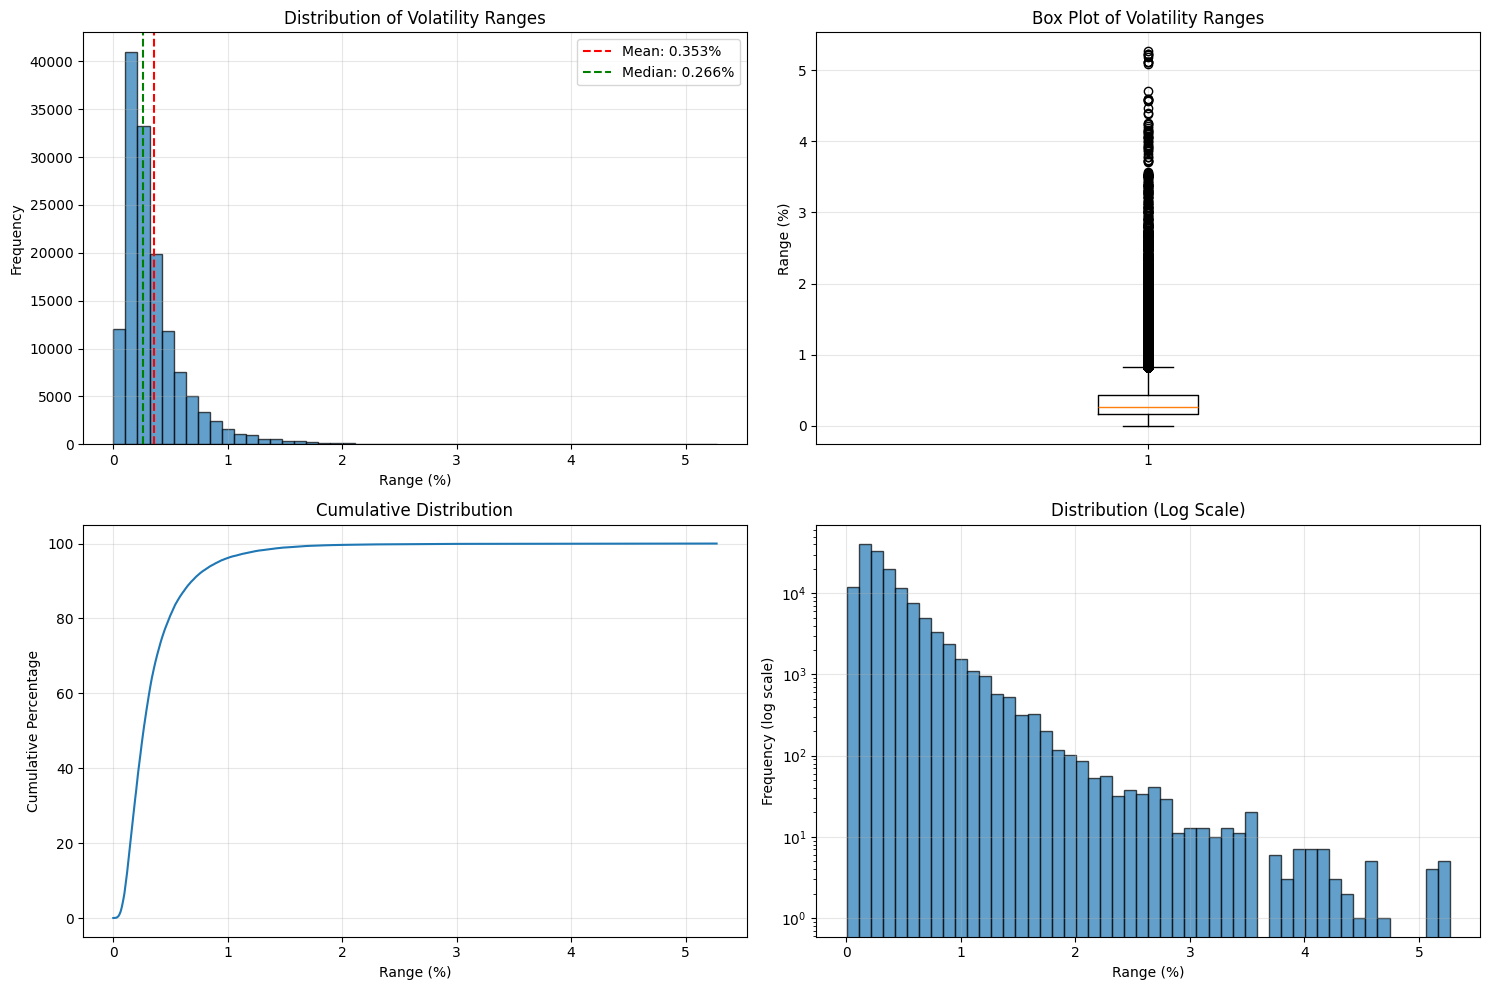

THRESHOLD PERFORMANCE TEST:
Threshold | High Vol Count | High Vol % | Balance Score
-------------------------------------------------------
   0.200% |       94,794 |     66.5% |        83.5
   0.300% |       61,091 |     42.9% |        92.9
   0.400% |       39,913 |     28.0% |        78.0
   0.500% |       27,399 |     19.2% |        69.2
   0.600% |       19,197 |     13.5% |        63.5
   0.700% |       13,759 |      9.7% |        59.7
   0.800% |       10,052 |      7.1% |        57.1


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

def analyze_range_distribution(ohlcv_df, steps=15):
    """
    Comprehensive analysis of the range column to find optimal threshold
    """
    # Calculate range if not already done
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)
    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    # Remove NaN values
    ranges = ohlcv_df['range'].dropna()

    print("=" * 60)
    print("RANGE DISTRIBUTION ANALYSIS")
    print("=" * 60)

    # Basic statistics
    print(f"Total samples: {len(ranges):,}")
    print(f"Mean range: {ranges.mean():.4f}%")
    print(f"Median range: {ranges.median():.4f}%")
    print(f"Std deviation: {ranges.std():.4f}%")
    print(f"Min range: {ranges.min():.4f}%")
    print(f"Max range: {ranges.max():.4f}%")
    print()

    # Percentiles
    percentiles = [10, 20, 25, 30, 40, 50, 60, 70, 75, 80, 90, 95, 99]
    print("PERCENTILES:")
    for p in percentiles:
        value = np.percentile(ranges, p)
        print(f"{p:2d}th percentile: {value:.4f}%")
    print()

    # Distribution shape
    skewness = stats.skew(ranges)
    kurtosis = stats.kurtosis(ranges)
    print(f"Skewness: {skewness:.4f} ({'right-skewed' if skewness > 0 else 'left-skewed' if skewness < 0 else 'symmetric'})")
    print(f"Kurtosis: {kurtosis:.4f} ({'heavy-tailed' if kurtosis > 0 else 'light-tailed'})")
    print()

    # Test different thresholds and show class distributions
    print("THRESHOLD ANALYSIS:")
    print("Threshold  | High Vol % | High Vol Count | Normal Vol Count")
    print("-" * 60)

    test_thresholds = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 1.0, 1.2, 1.5]
    threshold_results = []

    for threshold in test_thresholds:
        high_vol_count = (ranges >= threshold).sum()
        normal_vol_count = (ranges < threshold).sum()
        high_vol_pct = (high_vol_count / len(ranges)) * 100

        print(f"{threshold:8.1f}%  | {high_vol_pct:8.1f}% | {high_vol_count:12,} | {normal_vol_count:14,}")

        threshold_results.append({
            'threshold': threshold,
            'high_vol_pct': high_vol_pct,
            'high_vol_count': high_vol_count,
            'normal_vol_count': normal_vol_count
        })

    print()

    # Find reasonable thresholds (between 20-40% for high volatility)
    print("RECOMMENDED THRESHOLDS (for 20-40% high volatility):")
    reasonable_thresholds = []
    for result in threshold_results:
        if 20 <= result['high_vol_pct'] <= 40:
            reasonable_thresholds.append(result)
            print(f"  {result['threshold']:.1f}% threshold -> {result['high_vol_pct']:.1f}% high volatility")

    if not reasonable_thresholds:
        print("  No thresholds in 20-40% range found. Consider these alternatives:")
        for result in threshold_results:
            if 15 <= result['high_vol_pct'] <= 50:
                print(f"  {result['threshold']:.1f}% threshold -> {result['high_vol_pct']:.1f}% high volatility")

    # Plot distribution
    plt.figure(figsize=(15, 10))

    # Histogram
    plt.subplot(2, 2, 1)
    plt.hist(ranges, bins=50, alpha=0.7, edgecolor='black')
    plt.axvline(ranges.mean(), color='red', linestyle='--', label=f'Mean: {ranges.mean():.3f}%')
    plt.axvline(ranges.median(), color='green', linestyle='--', label=f'Median: {ranges.median():.3f}%')
    plt.xlabel('Range (%)')
    plt.ylabel('Frequency')
    plt.title('Distribution of Volatility Ranges')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # Box plot
    plt.subplot(2, 2, 2)
    plt.boxplot(ranges, vert=True)
    plt.ylabel('Range (%)')
    plt.title('Box Plot of Volatility Ranges')
    plt.grid(True, alpha=0.3)

    # Cumulative distribution
    plt.subplot(2, 2, 3)
    sorted_ranges = np.sort(ranges)
    cumulative = np.arange(1, len(sorted_ranges) + 1) / len(sorted_ranges) * 100
    plt.plot(sorted_ranges, cumulative)
    plt.xlabel('Range (%)')
    plt.ylabel('Cumulative Percentage')
    plt.title('Cumulative Distribution')
    plt.grid(True, alpha=0.3)

    # Log scale histogram (if very skewed)
    plt.subplot(2, 2, 4)
    plt.hist(ranges, bins=50, alpha=0.7, edgecolor='black')
    plt.yscale('log')
    plt.xlabel('Range (%)')
    plt.ylabel('Frequency (log scale)')
    plt.title('Distribution (Log Scale)')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

    return ranges, threshold_results

def find_optimal_threshold_by_criteria(ranges, target_high_vol_pct=30):
    """
    Find threshold that gives approximately target percentage of high volatility samples
    """
    threshold = np.percentile(ranges, 100 - target_high_vol_pct)
    actual_pct = ((ranges >= threshold).sum() / len(ranges)) * 100

    print(f"\nFor {target_high_vol_pct}% high volatility:")
    print(f"Recommended threshold: {threshold:.4f}%")
    print(f"Actual high volatility percentage: {actual_pct:.2f}%")

    return threshold

def test_threshold_performance(ohlcv_df, threshold_list, steps=15):
    """
    Test multiple thresholds and show class balance for each
    """
    # Calculate range
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)
    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    ranges = ohlcv_df['range'].dropna()

    print("THRESHOLD PERFORMANCE TEST:")
    print("Threshold | High Vol Count | High Vol % | Balance Score")
    print("-" * 55)

    for threshold in threshold_list:
        high_count = (ranges >= threshold).sum()
        total_count = len(ranges)
        high_pct = (high_count / total_count) * 100

        # Balance score: closer to 50-50 is better, penalize extreme imbalance
        balance_score = 100 - abs(50 - high_pct)

        print(f"{threshold:8.3f}% | {high_count:12,} | {high_pct:8.1f}% | {balance_score:11.1f}")

def create_categorization_function(threshold):
    """
    Create a categorization function with your chosen threshold
    """
    def categorize_volatility(range_pct):
        if pd.isna(range_pct):
            return np.nan
        return 'high_volatility' if range_pct >= threshold else 'normal_volatility'

    return categorize_volatility

# Complete usage example:

# Step 1: Analyze your data
ranges, results = analyze_range_distribution(oh_df)

# Step 2: Test specific thresholds
test_thresholds = [0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8]
test_threshold_performance(oh_df, test_thresholds)

# Step 3: Choose your threshold and create categorization function
chosen_threshold = 0.4  # Replace with your chosen value
categorize_func = create_categorization_function(chosen_threshold)

# Step 4: Use in your prepare_data function
def prepare_data_with_custom_threshold(news_df, ohlcv_df, threshold, steps=15):
    ohlcv_df['future_high'] = ohlcv_df['high'].rolling(window=steps).max().shift(-steps)
    ohlcv_df['future_low'] = ohlcv_df['low'].rolling(window=steps).min().shift(-steps)
    ohlcv_df['range'] = (ohlcv_df['future_high'] - ohlcv_df['future_low']) / ohlcv_df['close'] * 100

    categorize_func = create_categorization_function(threshold)
    ohlcv_df['label'] = ohlcv_df['range'].apply(categorize_func)

    merged = merge_ohlcv_with_news(ohlcv_df, news_df)
    merged = merged.dropna(subset=['label'])

    return merged[['dateTime', 'content', 'label']]